In [1]:
import numpy as np
#%load_ext cudf.pandas
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType, Normalization

In [2]:
df1 = pd.read_csv('engine_system.csv')

In [3]:
df1.head()

,Unnamed: 0,61444-513,61444-512,61443-91
0,7,28.0,34.0,19.2
1,37,45.0,7.0,0.0
2,67,7.0,0.0,0.0
3,97,32.0,0.0,0.0
4,127,15.0,15.0,0.0


In [4]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df1.shape

(126729, 3)

In [6]:
seq_len = 33 
model = DGAN(DGANConfig(
    max_sequence_len=seq_len,
    sample_len=1,
    feature_num_layers=10,                       #was 4
    feature_num_units=200,                      #was 50
    feature_noise_dim=10,
    batch_size=256,
    epochs=10000,  # For real data sets, 100-1000 epochs is typical     #was 5k
))

model.train_dataframe(
    df1,
    df_style= "long",
    feature_columns=['61443-91', '61444-512', '61444-513'],
)

2024-04-10 13:05:44,007 : MainThread : WARNING : Example ID column not provided, DGAN will autosplit dataset into sequences of size 33!
2024-04-10 13:05:45,599 : MainThread : INFO : epoch: 0
2024-04-10 13:05:48,849 : MainThread : INFO : epoch: 1
2024-04-10 13:05:50,057 : MainThread : INFO : epoch: 2
2024-04-10 13:05:51,229 : MainThread : INFO : epoch: 3
2024-04-10 13:05:52,479 : MainThread : INFO : epoch: 4
2024-04-10 13:05:53,669 : MainThread : INFO : epoch: 5
2024-04-10 13:05:54,835 : MainThread : INFO : epoch: 6
2024-04-10 13:05:55,997 : MainThread : INFO : epoch: 7
2024-04-10 13:05:57,250 : MainThread : INFO : epoch: 8
2024-04-10 13:06:00,746 : MainThread : INFO : epoch: 9
2024-04-10 13:06:02,233 : MainThread : INFO : epoch: 10
2024-04-10 13:06:03,406 : MainThread : INFO : epoch: 11
2024-04-10 13:06:04,557 : MainThread : INFO : epoch: 12
2024-04-10 13:06:05,737 : MainThread : INFO : epoch: 13
2024-04-10 13:06:06,610 : MainThread : INFO : epoch: 14
2024-04-10 13:06:07,461 : MainThre

RuntimeError: cuDNN error: CUDNN_STATUS_INTERNAL_ERROR

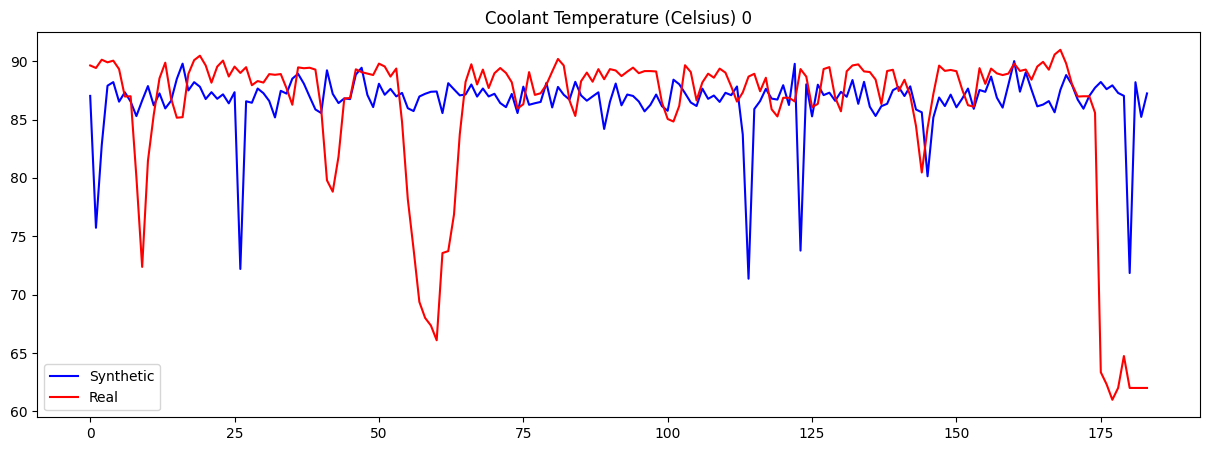

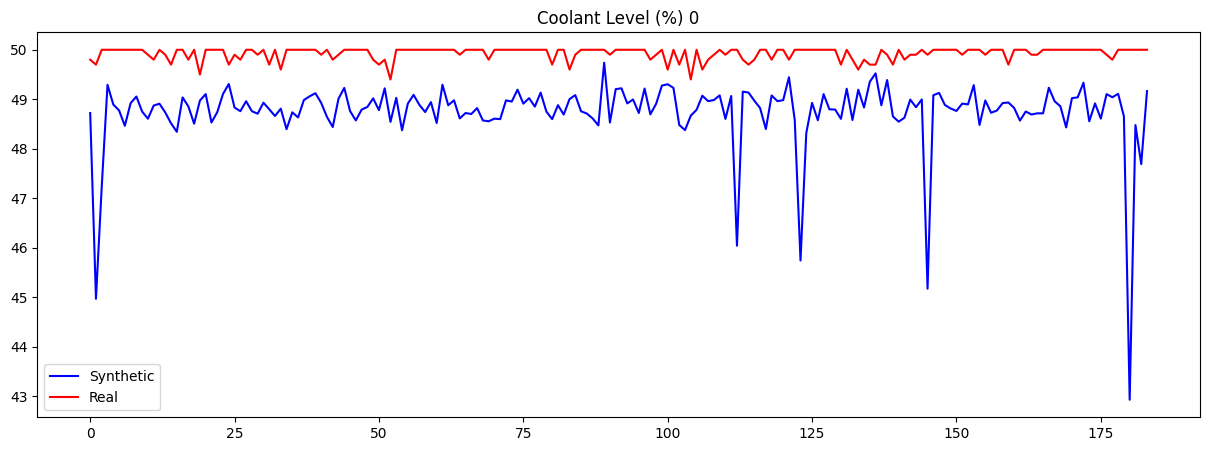

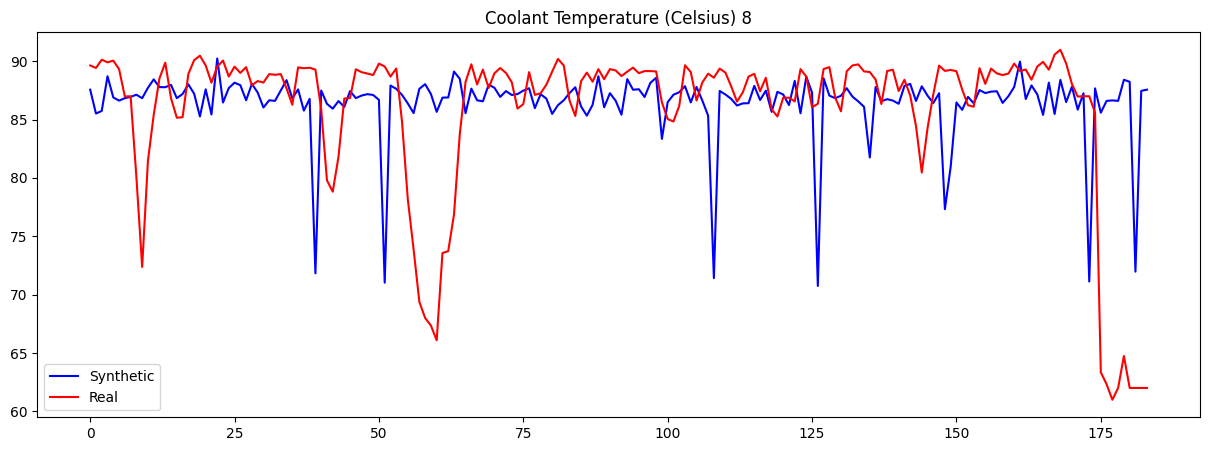

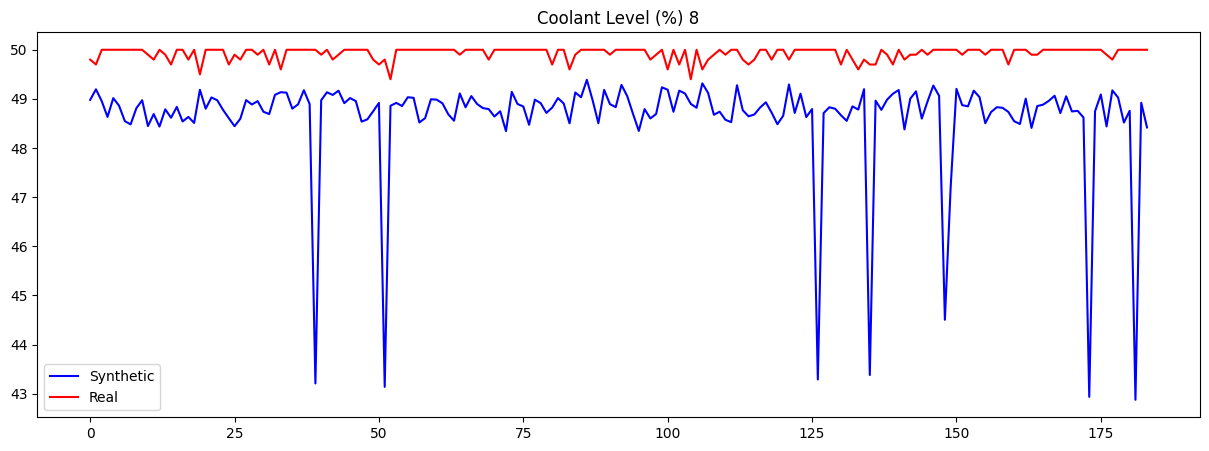

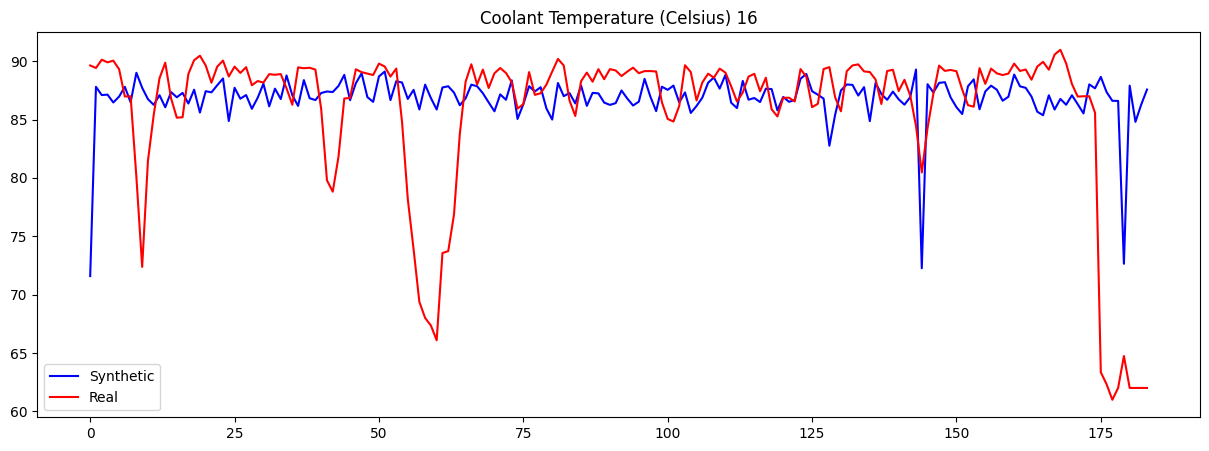

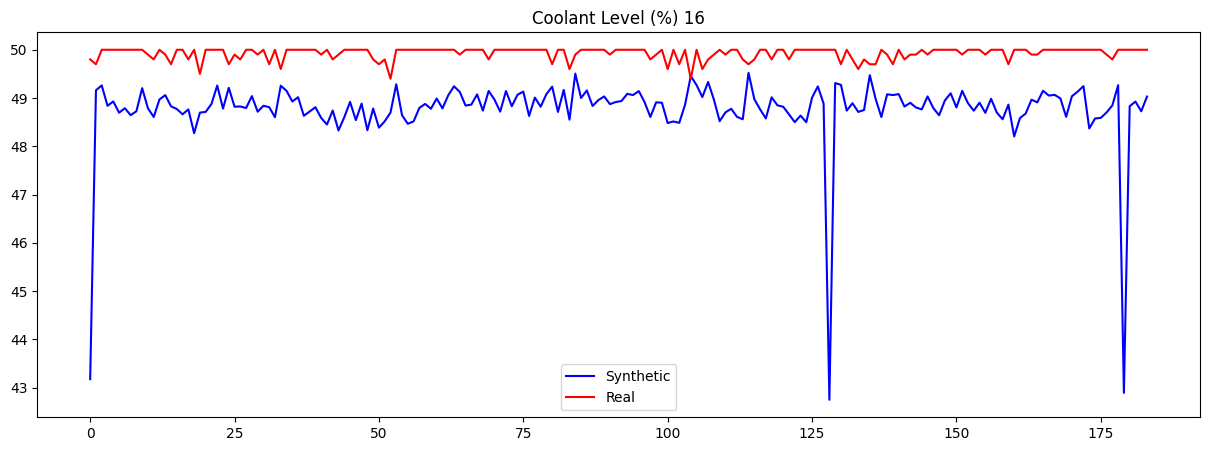

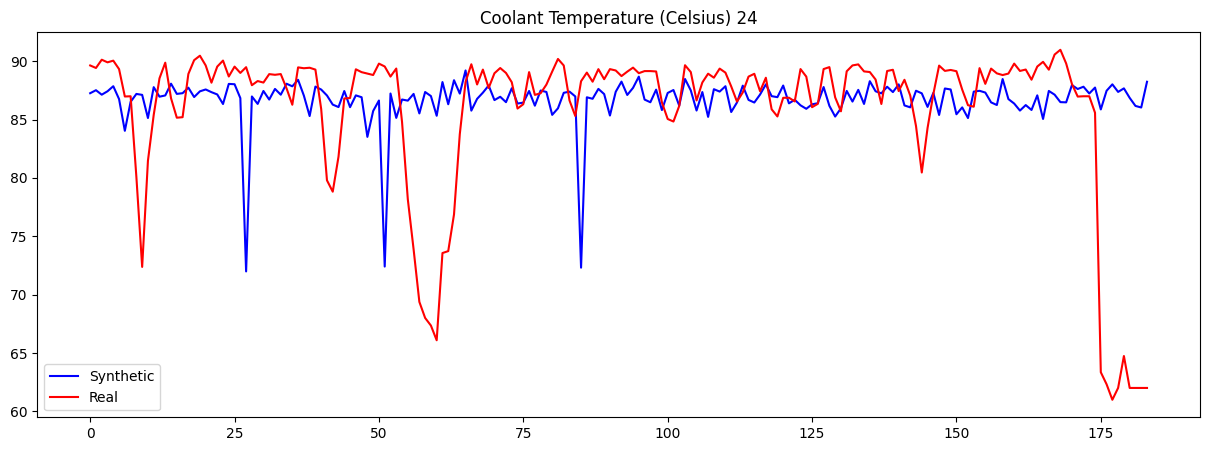

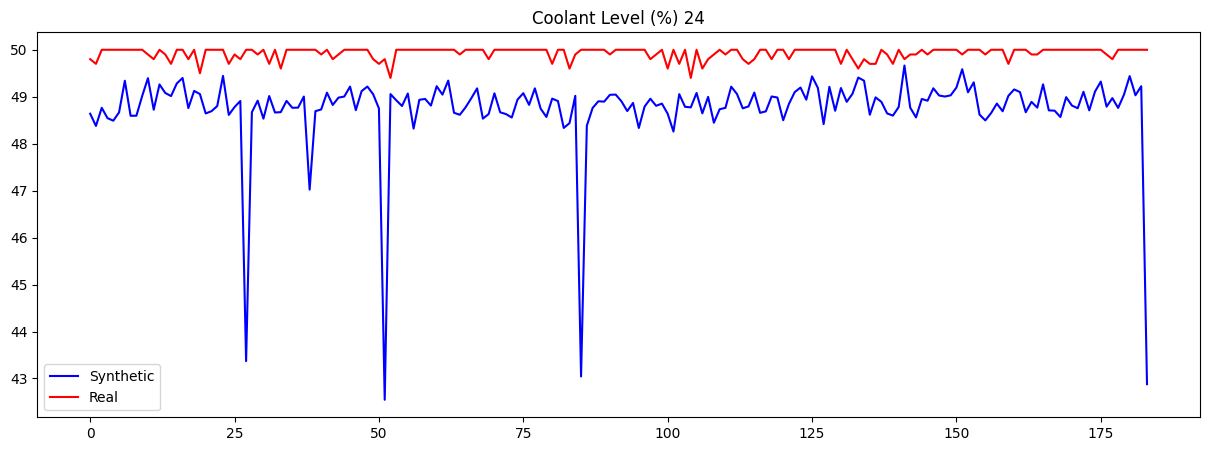

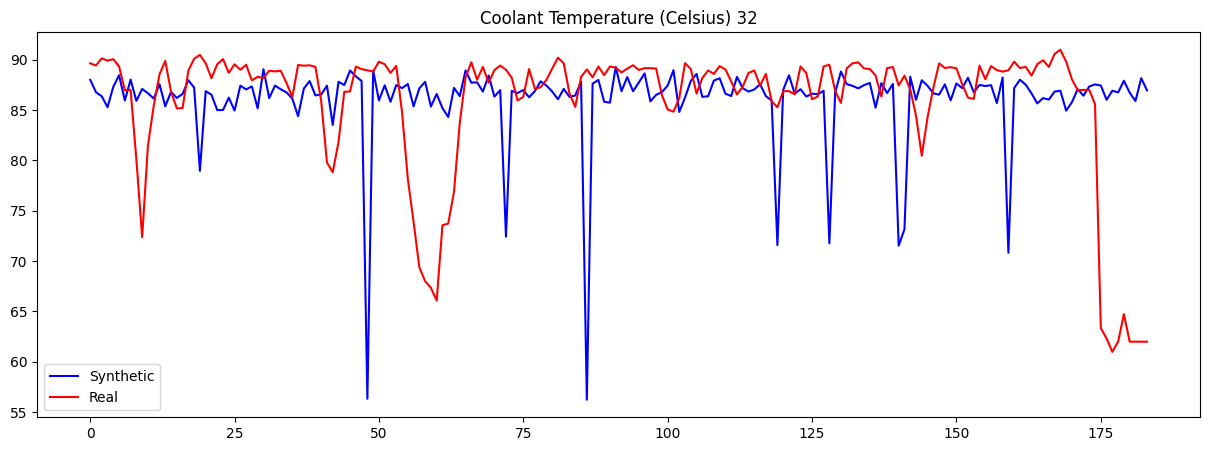

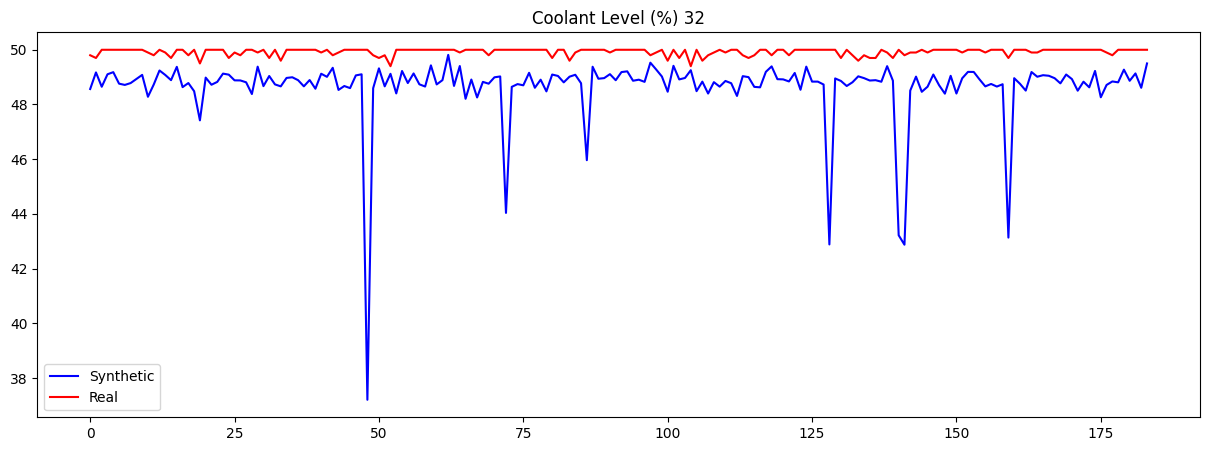

In [ ]:
df = df1.copy()
path = 'Generated_engine_sys_data\'
for i in range(39):
    name = path+"synthetic_engine_"+str(i)+".csv"
    

    # Generate synthetic data
    synthetic_df = model.generate_dataframe(int(len(df)/seq_len))

    synthetic_df
    w = 500
    if i % 8 == 0:
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Accelerator Pedal Position (%) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Driver\'s Demand Torque (%) '  + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = synthetic_df['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        v2 = df1['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
        plt.title('Actual Engine Torque (%) ' + str(i))
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
        plt.legend()

    synthetic_df.to_csv(name)
    del synthetic_df
plt.show()

In [ ]:
sdf = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\Generated_engine_sys_data\synthetic_engine_32.csv')
sdf.drop(['Unnamed: 0', 'example_id'], axis=1, inplace=True)

In [ ]:
sdf.head()

,65263-111,65262-110
0,48.745842,84.59673
1,48.745842,84.59673
2,48.745842,84.59673
3,48.745842,84.59673
4,48.745842,84.59673


KeyError: '64817-1598'

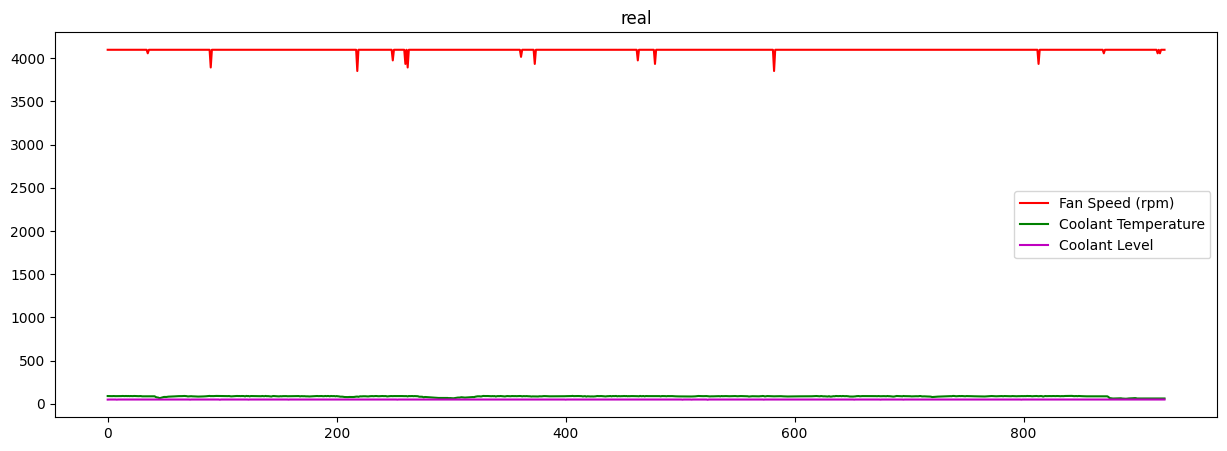

<Figure size 1500x500 with 0 Axes>

In [ ]:
w=500
plt.figure(figsize=(15,5))
v2 = df1['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v3 = df1['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v4 = df1['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('Raw Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Driver\'s Demand Torque (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Actual Engine Torque (%) ')
plt.legend()
plt.figure(figsize=(15,5))
v2 = sdf['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v3 = sdf['61444-512'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v4 = sdf['61444-513'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
plt.title('Synthetic Data')
plt.plot(np.arange(len(v2)),v2, c='r', label='Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v2)),v3, c='g', label='Driver\'s Demand Torque (%) ')
plt.plot(np.arange(len(v2)),v4, c='m', label='Actual Engine Torque (%) ')
plt.legend()
plt.show()


In [ ]:
df1.corr()

,64817-1598,65263-111,65262-110
64817-1598,1.000000,-0.000882,-0.003703
65263-111,-0.000882,1.000000,-0.008335
65262-110,-0.003703,-0.008335,1.000000


In [ ]:
sdf.corr()

,65263-111,65262-110
65263-111,1.000000,0.130761
65262-110,0.130761,1.000000


In [ ]:
df1.describe()

,64817-1598,65263-111,65262-110
count,92560.000000,92560.000000,92560.000000
mean,4093.787381,49.928155,85.698293
std,95.173993,1.893975,7.293150
min,0.000000,0.000000,-40.000000
25%,4096.000000,50.000000,86.000000
50%,4096.000000,50.000000,88.000000
75%,4096.000000,50.000000,90.000000
max,4096.000000,50.000000,94.000000


In [ ]:
sdf.describe()

,65263-111,65262-110
count,92544.000000,92544.000000
mean,49.998759,86.641776
std,0.001907,12.422675
min,49.975800,55.369600
25%,49.998559,84.510543
50%,49.999460,93.942215
75%,49.999798,93.986590
max,50.000000,93.995865


In [ ]:
def moving_avg(x, N=1000):          #function to compute moving average
    return np.convolve(x, np.ones((N,))/N, mode='valid')

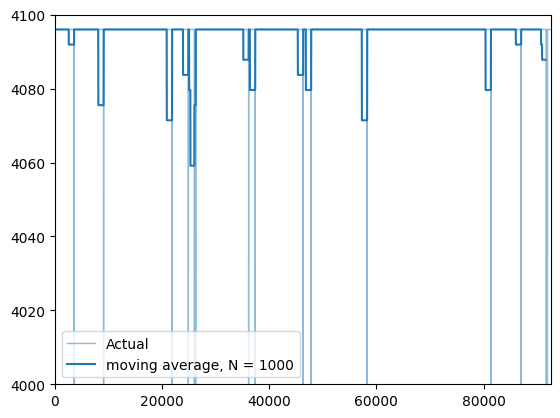

In [ ]:

plt.plot(df1['61443-91'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61443-91'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61443-91']))
plt.title('Accelerator Pedal Position (%) Raw Data')
plt.legend()
plt.show()


In [ ]:
plt.plot(sdf['61443-91'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61443-91'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61443-91']))
plt.title('Accelerator Pedal Position (%) Synthetic Data')
plt.legend()
plt.show()

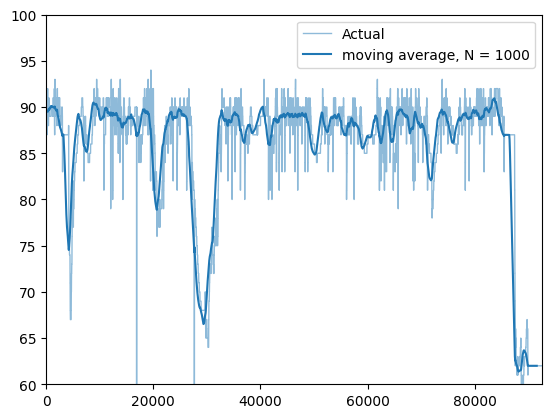

In [ ]:
plt.plot(df1['61444-512'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61444-512'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61444-512']))
plt.title('Driver\'s Demand Torque (%) Raw Data')
plt.legend()
plt.show()

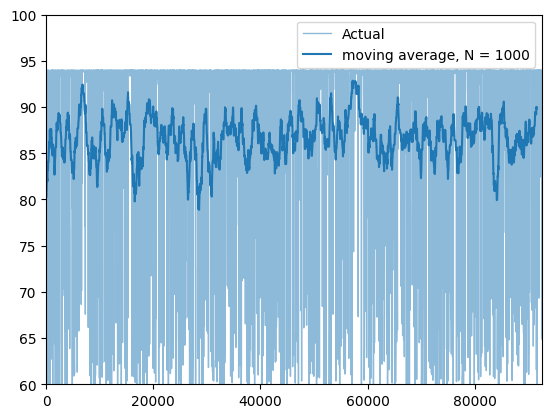

In [ ]:
plt.plot(sdf['61444-512'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61444-512'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61444-512']))
plt.title('Driver\'s Demand Torque (%) Synthetic Data')
plt.legend()
plt.show()

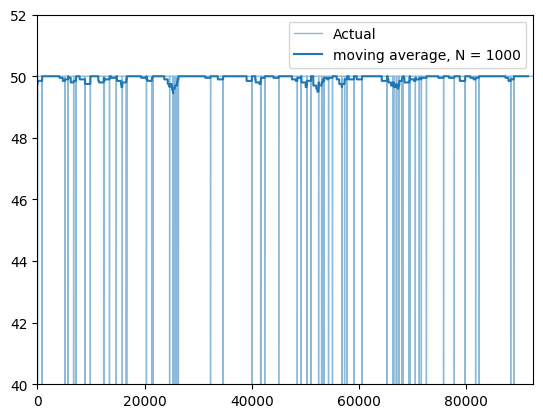

In [ ]:
plt.plot(df1['61444-513'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(df1['61444-513'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['61444-513']))
plt.title('Actual Engine Torque (%) Raw Data')
plt.legend()
plt.show()

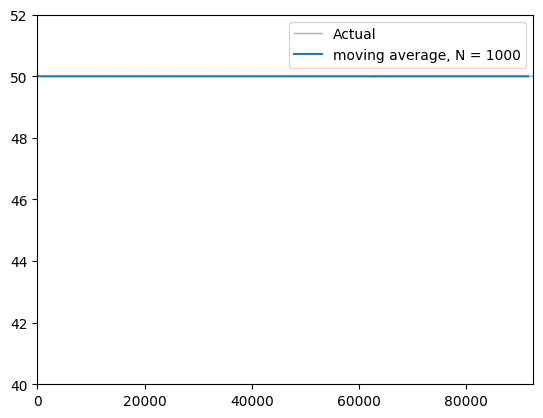

In [ ]:
plt.plot(sdf['61444-513'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(sdf['61444-513'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(sdf['61444-513']))
plt.title('Actual Engine Torque (%) Synthetic Data')
plt.legend()
plt.show()